In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import ipympl
import pysam

import sys
sys.path.append("../../../src/")
import lakeview as lv

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 72

In [3]:
%matplotlib widget
plt.ioff()

In [4]:
REGION = "17:64040802-64045633"

ILLUMINA_BAM_PATH = (
    "data/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam"
)
ILLUMINA_BAM_URL = "https://s3.amazonaws.com/igv.org.demo/SKBR3/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam"
PACBIO_BAM_PATH = "data/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam"
PACBIO_BAM_URL = "https://s3.amazonaws.com/igv.org.demo/SKBR3/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam 17:64040802-64045633"

if os.path.isfile(ILLUMINA_BAM_PATH):
    illumina_painter = lv.SequenceAlignment.from_file(ILLUMINA_BAM_PATH, "rb")
else:
    illumina_painter = lv.SequenceAlignment.from_file(
        ILLUMINA_BAM_URL, "rb", region=REGION
    )

if os.path.isfile(PACBIO_BAM_PATH):
    pacbio_painter = lv.SequenceAlignment.from_file(PACBIO_BAM_PATH, "rb")
else:
    pacbio_painter = lv.SequenceAlignment.from_file(PACBIO_BAM_URL, "rb", region=REGION)

[E::idx_find_and_load] Could not retrieve index file for 'data/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam'
[E::idx_find_and_load] Could not retrieve index file for 'data/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam'
[E::idx_find_and_load] Could not retrieve index file for 'data/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam'
[E::idx_find_and_load] Could not retrieve index file for 'data/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam'


In [5]:
gv = lv.GenomeViewer(4, figsize=(12, 15), height_ratios=(1, 8, 1, 8))

illumina_painter.draw_pileup(gv.axes[0])
illumina_painter.draw_alignment(
    gv.axes[1],
    colors=lambda segment: "lightgray" if segment.is_proper_pair else "firebrick",
    groups=lambda segment: 0 if segment.is_forward else 1,
    max_depth=30,
)
pacbio_painter.draw_pileup(gv.axes[2])
pacbio_painter.draw_alignment(gv.axes[3])
gv.set_xlim(64040802, 64045633)

In [6]:
gv

AppLayout(children=(VBox(children=(HBox(children=(Text(value='64,040,802 - 64,045,633', placeholder=''), Butto…

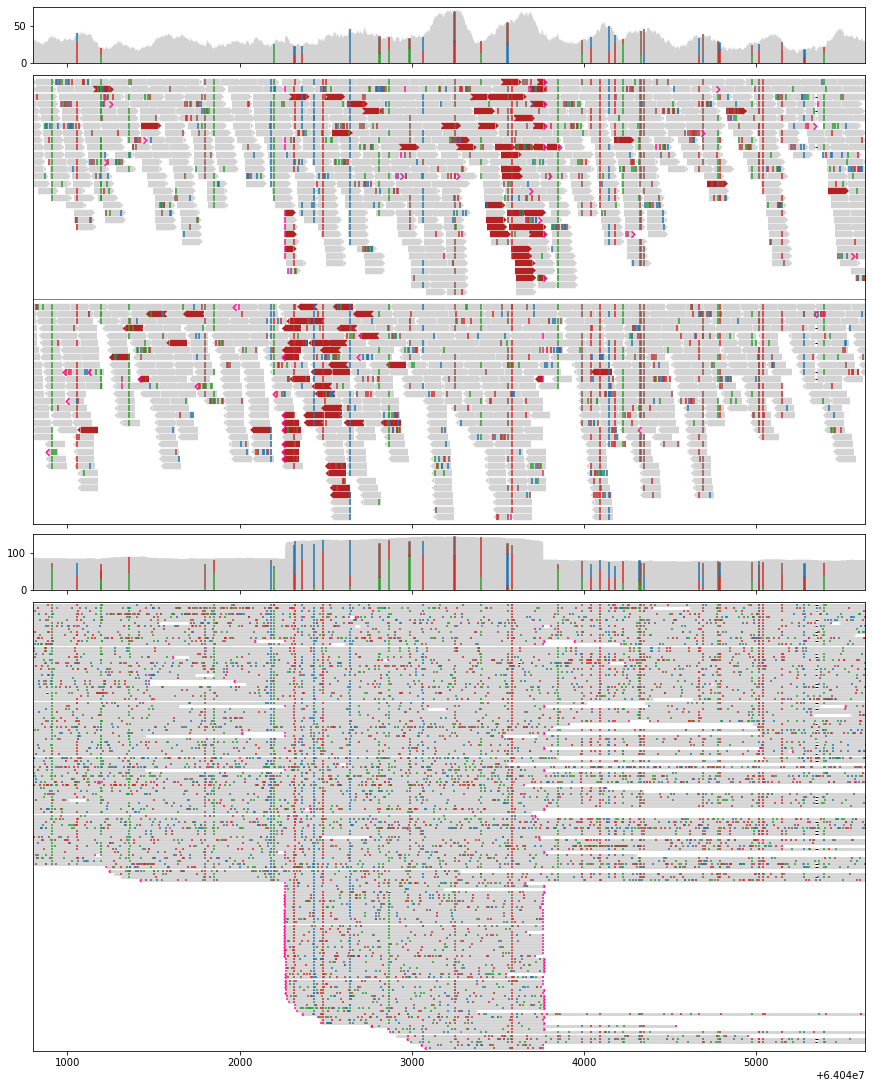

In [7]:
gv.figure

In [8]:
gv.savefig("figures/SKBR3.png", dpi=300)